# Introduction

Hello, hello, hello!

Welcome to my house sale prediction project! This notebook guides you through a comprehensive journey starting from data preprocessing and cleaning, moving on to exploratory data analysis (EDA), and culminating in predictive modeling to forecast whether houses sell or not.

The dataset includes property details such as year built, bedrooms, bathrooms, square footage, and more, helping us uncover patterns that influence house sales.

Throughout the notebook, I've focused on creating reusable functions and thoughtful visualizations to make the analysis easy to follow and adaptable for your own projects.

Whether you're here to explore real estate trends or machine learning in action, I hope you find this project both informative and enjoyable!

Thanks for stopping by — happy exploring!

# Import necessary libralies

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/usa-house-sales-data/us_house_Sales_data.csv


# Read the data file

In [2]:
def show_df(filepath_or_buffer):
    """reads a csv file and displays Dataframe"""
    df = pd.read_csv(filepath_or_buffer)
    return df

house_price = "/kaggle/input/usa-house-sales-data/us_house_Sales_data.csv"
df = show_df(house_price)
df.sample(5)

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
1813,"$772,844","1738 Maple Dr, Fresno, NY 48506",Fresno,48506,NY,4 bds,1 ba,2290 sqft,6616 sqft,1981,93,Townhouse,Z473742,Jane Smith - Keller Williams,For Sale,https://www.zillow.com/homedetails/99927218_zpid/
1882,"$393,230","6468 Maple Dr, Sacramento, IL 74608",Sacramento,74608,IL,5 bds,3 ba,3177 sqft,5099 sqft,1995,24,Apartment,Z909819,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/34186128_zpid/
1614,"$1,215,321","4914 Elm St, San Francisco, CA 44651",San Francisco,44651,CA,1 bds,4 ba,1345 sqft,5463 sqft,1962,63,Multi-Family,Z408549,Alex Johnson - Compass,Sold,https://www.zillow.com/homedetails/39294054_zpid/
237,"$832,115","1613 Maple Dr, Sacramento, TX 51205",Sacramento,51205,TX,3 bds,1 ba,3103 sqft,7144 sqft,2016,75,Single Family,Z906426,Jane Smith - Keller Williams,Pending,https://www.zillow.com/homedetails/97385723_zpid/
1552,"$1,244,267","3848 Maple Dr, Los Angeles, FL 13119",Los Angeles,13119,FL,3 bds,4 ba,2492 sqft,5586 sqft,1957,38,Apartment,Z201834,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/66395722_zpid/


# Get overview of the data

In [3]:
df.info()
# no null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           3000 non-null   object
 1   Address         3000 non-null   object
 2   City            3000 non-null   object
 3   Zipcode         3000 non-null   int64 
 4   State           3000 non-null   object
 5   Bedrooms        3000 non-null   object
 6   Bathrooms       3000 non-null   object
 7   Area (Sqft)     3000 non-null   object
 8   Lot Size        3000 non-null   object
 9   Year Built      3000 non-null   int64 
 10  Days on Market  3000 non-null   int64 
 11  Property Type   3000 non-null   object
 12  MLS ID          3000 non-null   object
 13  Listing Agent   3000 non-null   object
 14  Status          3000 non-null   object
 15  Listing URL     3000 non-null   object
dtypes: int64(3), object(13)
memory usage: 375.1+ KB


In [4]:
df.duplicated().sum()
# no duplicated rows

0

In [5]:
df.shape

(3000, 16)

## Check distribution of data

In [6]:
def distribution_col(dataframe, column_name):
    """checks distribution of values in the column."""
    distribution = dataframe[column_name].value_counts().sort_index()

    print(f"Distribution of values in {column_name}:")
    print(distribution)
    print(f"Total: {len(distribution)} unique values\n")

In [7]:
distribution_col(df, "Bedrooms")
distribution_col(df, "Bathrooms")

Distribution of values in Bedrooms:
Bedrooms
1 bds    494
2 bds    533
3 bds    518
4 bds    482
5 bds    471
6 bds    502
Name: count, dtype: int64
Total: 6 unique values

Distribution of values in Bathrooms:
Bathrooms
1 ba    752
2 ba    751
3 ba    737
4 ba    760
Name: count, dtype: int64
Total: 4 unique values



In [8]:
distribution_col(df, "City")
distribution_col(df, "State")

Distribution of values in City:
City
Fresno           583
Los Angeles      617
Sacramento       609
San Diego        586
San Francisco    605
Name: count, dtype: int64
Total: 5 unique values

Distribution of values in State:
State
CA    659
FL    578
IL    599
NY    599
TX    565
Name: count, dtype: int64
Total: 5 unique values



In [9]:
distribution_col(df, "Property Type")
distribution_col(df, "Status")

Distribution of values in Property Type:
Property Type
Apartment        622
Condo            617
Multi-Family     564
Single Family    583
Townhouse        614
Name: count, dtype: int64
Total: 5 unique values

Distribution of values in Status:
Status
For Sale     957
Pending      998
Sold        1045
Name: count, dtype: int64
Total: 3 unique values



In [10]:
distribution_col(df, "Listing Agent")

Distribution of values in Listing Agent:
Listing Agent
Alex Johnson - Compass          617
Emily Davis - Century 21        594
Jane Smith - Keller Williams    613
John Doe - RE/MAX               587
Mike Lee - Coldwell Banker      589
Name: count, dtype: int64
Total: 5 unique values



## Come up with questions prior to conducting the analysis

In [11]:
# How old are the houses (in years)?
df["house_age"] = 2025 - df["Year Built"]
df["house_age"].describe()

count    3000.000000
mean       38.185667
std        21.272252
min         2.000000
25%        19.000000
50%        38.000000
75%        57.000000
max        75.000000
Name: house_age, dtype: float64

In [12]:
# How many houses are sold vs pending vs for sale?
df["Status"].value_counts(normalize=True) * 100

Status
Sold        34.833333
Pending     33.266667
For Sale    31.900000
Name: proportion, dtype: float64

In [13]:
 # What are top 5 listing agents by number of properties
df["Listing Agent"].value_counts().head(5)

Listing Agent
Alex Johnson - Compass          617
Jane Smith - Keller Williams    613
Emily Davis - Century 21        594
Mike Lee - Coldwell Banker      589
John Doe - RE/MAX               587
Name: count, dtype: int64

# Data preprocessing

In [14]:
def preprocess(filepath_or_buffer = house_price):
    """prepares and transforms the dataframe"""

    # change data types
    dtype_mapper = {"Address" : "string",
                    "City": "string",
                    "State" : "string",
                    "Bedrooms" : "string",
                    "Bathrooms" : "string",
                    "Area (Sqft)" : "string",
                    "Lot Size" : "string",
                    "Property Type" : "string",
                    "MLS ID" : "string",
                    "Listing Agent" : "string",
                    "Status" : "string",
                    "Listing URL" : "string"}
    
    # change columns names
    mapper = {"Area (Sqft)" : "Area_sqft",
              "Lot Size" : "Lot_size",
              "Year Built" : "Year_built",
              "Days on Market" : "Days_on_market",
              "Property Type" : "Property_type",
              "MLS ID" : "MLS_ID",
              "Listing Agent" : "Listing_agent",
              "Listing URL" : "Listing_URL"}

    # reassign the state values
    correct_state_map = {"Fresno": "CA",
                         "Los Angeles": "CA",
                         "Sacramento": "CA",
                         "San Diego": "CA",
                         "San Francisco": "CA"}

    # change data type
    df = pd.read_csv(house_price, dtype = dtype_mapper)
    df = df.rename(columns = mapper)

    # Format columns
    # remove $ and commas, convert to float
    df["price_in_usd"] = df["Price"].replace({'\$': '', ',': ''}, regex=True).astype(float)
    # Clean Bedrooms: extract only the number
    df["num_of_bed"] = df["Bedrooms"].str.extract(r'(\d+)').astype(int)
    # Clean Bathrooms: extract only the number
    df["num_of_bath"] = df["Bathrooms"].str.extract(r'([\d\.]+)').astype(int)
    # Clean Area (Sqft): remove 'sqft' and convert
    df["area_sqft"] = df["Area_sqft"].str.replace('sqft', '').str.replace(',', '').str.strip().astype(float)
    # Clean Lot Size: same idea
    df["lot_size_sqft"] = df["Lot_size"].str.replace('sqft', '').str.replace(',', '').str.strip().astype(float)
    # Extract only street name
    df["Street"] = df["Address"].str.split(',').str[0].str.strip()
    # drop the old columns 
    df.drop(columns=["Price", "Bedrooms", "Bathrooms", "Area_sqft", "Lot_size"], inplace=True)

    # Apply correct_state_map mapping to fix mismatched state values
    # Create a corrected state column
    df["correct_state"] = df["City"].map(correct_state_map)
    # Find mismatches (optional to review before fixing)
    mismatches = df[df["State"] != df["correct_state"]]
    # Replace incorrect state with correct one
    df["State"] = df["correct_state"]
    # Drop helper column if you no longer need it
    df.drop(columns="correct_state", inplace=True)

    print("Samples of mismatched rows")
    print(mismatches[["Address", "City", "State", "correct_state"]].sample(5))

    return df

hp = preprocess()
hp.sample(5)

Samples of mismatched rows
                                   Address           City State correct_state
2506    4557 Main St, Sacramento, FL 64643     Sacramento    FL            CA
1327    8468 Oak Ave, Sacramento, TX 71653     Sacramento    TX            CA
36      5156 Maple Dr, San Diego, NY 70313      San Diego    NY            CA
2078    2642 Elm St, Los Angeles, NY 75225    Los Angeles    NY            CA
1300  6065 Elm St, San Francisco, NY 88991  San Francisco    NY            CA


,Address,City,Zipcode,State,Year_built,Days_on_market,Property_type,MLS_ID,Listing_agent,Status,Listing_URL,price_in_usd,num_of_bed,num_of_bath,area_sqft,lot_size_sqft,Street
2432,"6306 Main St, Fresno, IL 43818",Fresno,43818,CA,1990,45,Single Family,Z773565,John Doe - RE/MAX,Sold,https://www.zillow.com/homedetails/42694479_zpid/,395473.0,5,1,2054.0,6068.0,6306 Main St
934,"5986 Main St, Fresno, NY 76056",Fresno,76056,CA,1978,112,Multi-Family,Z778079,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/88765395_zpid/,121708.0,3,3,3978.0,2483.0,5986 Main St
1764,"6046 Oak Ave, Fresno, FL 75339",Fresno,75339,CA,1969,90,Apartment,Z272760,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/77607332_zpid/,1334500.0,2,2,848.0,7441.0,6046 Oak Ave
991,"540 Pine Rd, Sacramento, FL 44381",Sacramento,44381,CA,1952,97,Townhouse,Z261171,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/87275357_zpid/,176255.0,3,3,2969.0,5769.0,540 Pine Rd
2621,"2266 Main St, San Diego, IL 67088",San Diego,67088,CA,2020,79,Single Family,Z364752,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/15030322_zpid/,1243844.0,4,3,1353.0,4933.0,2266 Main St


In [15]:
hp.describe()

,Zipcode,Year_built,Days_on_market,price_in_usd,num_of_bed,num_of_bath,area_sqft,lot_size_sqft
count,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000
mean,55264.197333,1986.814333,61.199333,8.108594e+05,3.469667,2.501667,2278.950667,5499.022333
std,25923.967932,21.272252,34.890983,3.997320e+05,1.706278,1.121792,977.406975,2628.573865
min,10006.000000,1950.000000,1.000000,1.002830e+05,1.000000,1.000000,600.000000,1000.000000
25%,33363.500000,1968.000000,31.000000,4.703870e+05,2.000000,1.000000,1440.750000,3183.500000
50%,55467.500000,1987.000000,62.000000,8.156300e+05,3.000000,2.000000,2274.500000,5543.500000
75%,77692.250000,2006.000000,91.000000,1.158188e+06,5.000000,4.000000,3111.000000,7799.000000
max,99955.000000,2023.000000,120.000000,1.499473e+06,6.000000,4.000000,3999.000000,9996.000000


# General descriptive analysis

## 1. Which city reports the highest average house price?
- Are expensive cities also offering larger homes, or just more premium pricing?

In [16]:
def avg_city_price(dataframe, column_name, top_n=5, sort_ascending=False):
    """
    Returns the top or bottom N cities (with state) by average value of a specified column.
    
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        column_name (str): Column to compute the average on.
        top_n (int): Number of results to return.
        sort_ascending (bool): Whether to sort in ascending order (for lowest values).
        
    Returns:
        pd.DataFrame: A DataFrame with City, and average value.
    """
    grouped = (
        dataframe
        .groupby("City")[column_name]
        .mean()
        .round(2)
        .reset_index()
        .sort_values(by=column_name, ascending=sort_ascending)
        .head(top_n)
    )

    label = "Lowest" if sort_ascending else "Top"
    print(f"\n{label} {top_n} cities by average {column_name}:\n")
    return grouped


In [17]:
avg_city_price(hp, "price_in_usd")


Top 5 cities by average price_in_usd:



,City,price_in_usd
0,Fresno,833497.57
1,Los Angeles,815039.32
3,San Diego,814489.25
2,Sacramento,804244.18
4,San Francisco,787924.53


## 2. Which property type has the highest average price?
- Great for investors, buyers, or market comparison.

In [18]:
def avg_price(dataframe, groupcol ,column_name, top_n=5, sort_ascending=False):
    """
    Returns the top or bottom N cities (with state) by average value of a specified column.
    
    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        column_name (str): Column to compute the average on.
        top_n (int): Number of results to return.
        sort_ascending (bool): Whether to sort in ascending order (for lowest values).
        
    Returns:
        pd.DataFrame: A DataFrame with City, and average value.
    """
    grouped = (
        dataframe
        .groupby([groupcol, "City"])[column_name]
        .mean()
        .round(2)
        .reset_index()
        .sort_values(by=column_name, ascending=sort_ascending)
        .head(top_n)
    )

    label = "Lowest" if sort_ascending else "Top"
    print(f"\n{label} {top_n} property type by average {column_name}:\n")
    return grouped

In [19]:
avg_price(hp, "Property_type", "price_in_usd",sort_ascending = True)


Lowest 5 property type by average price_in_usd:



,Property_type,City,price_in_usd
4,Apartment,San Francisco,713853.67
7,Condo,Sacramento,744216.26
9,Condo,San Francisco,748222.55
21,Townhouse,Los Angeles,767984.21
8,Condo,San Diego,771069.02


In [20]:
avg_price(hp, "Property_type", "price_in_usd",sort_ascending = False)


Top 5 property type by average price_in_usd:



,Property_type,City,price_in_usd
0,Apartment,Fresno,912401.06
18,Single Family,San Diego,864728.04
16,Single Family,Los Angeles,859470.79
1,Apartment,Los Angeles,856884.76
14,Multi-Family,San Francisco,854843.71


## 3 Average number of sold propertyies in each city

In [21]:
def avg_sold_properties_per_city(dataframe, top_n=5, sort_ascending=False):
    """
    Returns the top or bottom N cities by number of sold properties.

    Parameters:
        dataframe (pd.DataFrame): The input DataFrame.
        top_n (int): Number of results to return.
        sort_ascending (bool): Whether to sort in ascending order.

    Returns:
        pd.DataFrame: A DataFrame with City and number of sold properties.
    """

    # Filter for Sold properties
    sold_df = dataframe[dataframe["Status"].str.lower() == "sold"]

    # Group by City and count
    grouped = (
        sold_df
        .groupby("City")
        .size()
        .reset_index(name="num_sold")
        .sort_values(by="num_sold", ascending=sort_ascending)
        .head(top_n)
    )

    label = "Lowest" if sort_ascending else "Top"
    print(f"\n{label} {top_n} cities by number of sold properties:\n")
    return grouped


In [22]:
avg_sold_properties_per_city(hp, top_n=5, sort_ascending=False) 


Top 5 cities by number of sold properties:



,City,num_sold
2,Sacramento,215
1,Los Angeles,214
3,San Diego,208
0,Fresno,205
4,San Francisco,203


## 4. Average price by property type

In [23]:
def avg_price(dataframe, groupby_col, column_name):
    """Calculates the average price of properties, grouped by a specified column. """
    grouped = (
        dataframe
        .groupby(groupby_col)[column_name]
        .mean()
        .round(2)
        .sort_values(ascending=False)
    )

    print(f"Average {column_name} by {groupby_col}:\n")
    return grouped

In [24]:
# Do Single Family homes cost more than Apartments or Townhouses?
avg_price(hp, "Property_type", "price_in_usd")

Average price_in_usd by Property_type:



Property_type
Apartment        825628.62
Single Family    824646.21
Multi-Family     824386.87
Townhouse        813447.35
Condo            768002.41
Name: price_in_usd, dtype: float64

## 5. Average Price by status (Sold vs Pending vs For Sale)¶
- Can reveal negotiation, discounting, or price stability in the market

In [25]:
avg_price(hp, "Status", "price_in_usd")

Average price_in_usd by Status:



Status
Sold        829101.28
For Sale    803237.49
Pending     799067.11
Name: price_in_usd, dtype: float64

- Status distribution

In [26]:
distribution_col(hp, "Status")

Distribution of values in Status:
Status
For Sale     957
Pending      998
Sold        1045
Name: count, dtype: Int64
Total: 3 unique values



## 6. Price per SQFT?
- Is price per square foot consistent across property types?
- Helps spot underpriced segments or better investments.
- Further question: how many property are underpriced?

In [27]:
def sqft_price(dataframe, column_name, sort_ascending=False):
    """returns price per sqft"""
    
    # create a new column
    hp["price_per_sqft"] = hp["price_in_usd"] / hp["area_sqft"]

    # group by property type 
    group_sqft = (dataframe.groupby("Property_type")["price_per_sqft"]
                 .mean()
                 .round(2).
                 sort_values()
                 # .head(top_n)
                 )
    
    label = "Lowest" if sort_ascending else "Top"
    print(f"\n{label} property type by average {column_name}:\n")
    return group_sqft

In [28]:
sqft_price(hp, "price_per_sqft")


Top property type by average price_per_sqft:



Property_type
Condo            438.06
Townhouse        454.79
Multi-Family     463.89
Apartment        466.05
Single Family    472.29
Name: price_per_sqft, dtype: float64

## 7. Do newer houses (built after 2000) cost more than older ones?
- Total number of old and new propety
- Average price between old and new houses
- Average price between old and new houses classified by property type
- property type distribution

**First, let check the number of the old and the new property in our dataset.**

In [29]:
def count_year_built(dataframe, column_name):
    """Returns the total number of property based on the year built."""
    
    sum_of_old_property = (dataframe[column_name] < 2000).sum()
    sum_of_new_property = (dataframe[column_name] >= 2000).sum()

    print(f"\nTotal number of properties built before year 2000: {sum_of_old_property}\n")
    print(f"Total number of properties built from year 2000 onwards: {sum_of_new_property}\n")

count_year_built(hp, "Year_built")


Total number of properties built before year 2000: 2013

Total number of properties built from year 2000 onwards: 987



**Average price between old and new houses**

In [30]:
def houses_old_vs_new(dataframe):
    """Compares average price between old and new houses (before vs after 2000)."""
    
    # Split the dataset
    df_new = dataframe[dataframe["Year_built"] >= 2000]
    df_old = dataframe[dataframe["Year_built"] < 2000]
    
    # Compute averages
    avg_price_new = df_new["price_in_usd"].mean().round(2)
    avg_price_old = df_old["price_in_usd"].mean().round(2)

    print(f"\nAverage price of NEW houses (Year Built ≥ 2000): ${avg_price_new:,.2f}")
    print(f"Average price of OLD houses (Year Built < 2000): ${avg_price_old:,.2f}")

    return {"new_house_avg_price": avg_price_new, "old_house_avg_price": avg_price_old}

In [31]:
houses_old_vs_new(hp)


Average price of NEW houses (Year Built ≥ 2000): $803,580.54
Average price of OLD houses (Year Built < 2000): $814,428.26


{'new_house_avg_price': 803580.54, 'old_house_avg_price': 814428.26}

**Average price between old and new houses, classified by property types**

In [32]:
def house_old_vs_new_proptype(dataframe):
    """compares average price between old and new houses by property type."""
    
    # Split the dataset
    df_new = dataframe[dataframe["Year_built"] >= 2000]
    df_old = dataframe[dataframe["Year_built"] < 2000]

    # group by property type (New)
    grouped_proptype_new = (df_new.groupby("Property_type")["price_in_usd"]
                 .mean()
                 .round(2).
                 sort_values()
                 )

    # # group by property type (Old)
    grouped_proptype_old = (df_old.groupby("Property_type")["price_in_usd"]
                 .mean()
                 .round(2).
                 sort_values()
                 # .head(top_n)
                 )
    
    print(f"\n New built property types (Year Built ≥ 2000) by average price (USD):\n")
    print(grouped_proptype_new)
    print(f"\n New built property types (Year Built < 2000) by average price (USD):\n")
    return grouped_proptype_old

In [33]:
house_old_vs_new_proptype(hp)


 New built property types (Year Built ≥ 2000) by average price (USD):

Property_type
Condo            757819.77
Townhouse        793863.55
Single Family    807802.81
Multi-Family     808572.52
Apartment        845271.30
Name: price_in_usd, dtype: float64

 New built property types (Year Built < 2000) by average price (USD):



Property_type
Condo            772672.46
Apartment        815104.02
Townhouse        822699.17
Multi-Family     832294.04
Single Family    832853.08
Name: price_in_usd, dtype: float64

**Property type distribution**

In [34]:
distribution_col(hp, "Property_type")

Distribution of values in Property_type:
Property_type
Apartment        622
Condo            617
Multi-Family     564
Single Family    583
Townhouse        614
Name: count, dtype: Int64
Total: 5 unique values



## 8. Which number of bedrooms tends to have the highest median price?

- Compare median price across bedroom counts
-  Why it matters: Useful for developers or planners.

In [35]:
def num_of_bed_median(dataframe, groupby_col, column_name):
    """Calculates the median price of properties, grouped by a specified column. """
    grouped = (
        dataframe
        .groupby(groupby_col)[column_name]
        .median()
        .round(2)
        .sort_values(ascending=False)
    )

    print(f"Median {column_name} by {groupby_col}:\n")
    return grouped

In [36]:
median_prices_by_bedrooms = num_of_bed_median(hp, "num_of_bed", "price_in_usd")
print(median_prices_by_bedrooms)

Median price_in_usd by num_of_bed:

num_of_bed
2    870333.0
4    835473.5
1    828855.0
6    816206.5
5    806408.0
3    765182.0
Name: price_in_usd, dtype: float64


## 9. How many houses are underpriced?

In [37]:
def identify_underpriced_properties(df):
    """
    Identifies underpriced properties based on price per square foot
    compared to the average for their property type.
    
    Adds columns:
    - price_per_sqft
    - expected_price_per_sqft
    - underpriced (boolean)
    - underpricing_gap (amount under average)
    
    Returns:
        df (DataFrame): Modified dataframe with underpricing analysis
        num_underpriced (int): Total count of underpriced properties
    """
    # Create a new column
    df["price_per_sqft"] = df["price_in_usd"] / df["area_sqft"]

    # Get average price per sqft by property type
    avg_sqft_price_by_type = df.groupby("Property_type")["price_per_sqft"].mean()

    # Map expected price per sqft
    df["expected_price_per_sqft"] = df["Property_type"].map(avg_sqft_price_by_type)

    # Flag underpriced properties
    df["underpriced"] = df["price_per_sqft"] < df["expected_price_per_sqft"]

    # Compute underpricing gap
    df["underpricing_gap"] = df["expected_price_per_sqft"] - df["price_per_sqft"]

    # Total underpriced
    num_underpriced = df["underpriced"].sum()

    print(f"Total underpriced properties: {num_underpriced}")
    return df, num_underpriced


In [38]:
def get_underpriced_summary(df, n=5):
    """
    Returns a summary DataFrame of the most underpriced properties.
    
    Parameters:
        df (DataFrame): Input dataframe with 'underpriced' and gap columns
        n (int): Number of rows to return

    Returns:
        DataFrame: Filtered table of underpriced properties with relevant info
    """
    if "underpriced" not in df.columns:
        print("Please run identify_underpriced_properties() first.")
        return None

    # Filter underpriced and show relevant columns
    summary = (
        df[df["underpriced"]]
        .round(2)
        .sort_values(by="underpricing_gap", ascending=False)
        [["City", "Property_type", "price_in_usd", "price_per_sqft", 
          "expected_price_per_sqft", "underpricing_gap"]]
        .head(n)
    )

    return summary


In [39]:
hp, total = identify_underpriced_properties(hp)
get_underpriced_summary(hp, n=10)

Total underpriced properties: 1913


,City,Property_type,price_in_usd,price_per_sqft,expected_price_per_sqft,underpricing_gap
2002,San Francisco,Single Family,120368.0,31.53,472.29,440.75
2468,Fresno,Single Family,101833.0,34.60,472.29,437.69
2497,Fresno,Apartment,104351.0,28.49,466.05,437.56
629,San Francisco,Apartment,104306.0,30.01,466.05,436.04
1176,Fresno,Single Family,130840.0,36.41,472.29,435.88
1616,San Francisco,Apartment,110859.0,30.36,466.05,435.70
1126,San Francisco,Apartment,105850.0,30.73,466.05,435.32
190,Fresno,Single Family,121284.0,37.12,472.29,435.16
2620,Los Angeles,Apartment,118223.0,32.14,466.05,433.91
2370,Sacramento,Apartment,125978.0,32.32,466.05,433.73


## 10. Underprice Segment Analysis

In [40]:
def pivot_underpriced_analysis(df):
    """
    Returns a pivot table of underpriced properties with average price
    by Property Type (rows) and City (columns) for clearer comparison.
    """
    if "underpriced" not in df.columns:
        raise ValueError("Please run identify_underpriced_properties() first.")

    underpriced_df = df[df["underpriced"]]

    pivot = (
        underpriced_df
        .groupby(["Property_type", "City"])["price_in_usd"]
        .mean()
        .round(2)
        .reset_index()
        .pivot(index="Property_type", columns="City", values="price_in_usd")
        .fillna("—") 
    )

    print("\n Pivot Table - Average Underpriced Property Prices")
    return pivot


In [41]:
pivot_underpriced_analysis(hp)


 Pivot Table - Average Underpriced Property Prices


City,Fresno,Los Angeles,Sacramento,San Diego,San Francisco
Property_type,,,,,
Apartment,727741.16,720504.30,672912.62,633510.45,570958.64
Condo,660518.05,576156.68,557387.06,593501.81,649631.06
Multi-Family,631945.15,681264.38,677976.41,648734.03,701397.14
Single Family,669294.29,671063.58,668703.24,688115.10,630526.32
Townhouse,618755.64,527421.34,703374.11,674232.42,647606.89


In [50]:
def pivot_underpriced_analysis_count(df):
    """
    Returns a pivot table of underpriced properties with average price
    by Property Type (rows) and City (columns) for clearer comparison.
    """
    if "underpriced" not in df.columns:
        raise ValueError("Please run identify_underpriced_properties() first.")

    underpriced_df = df[df["underpriced"]]

    pivot = (
        underpriced_df
        .groupby(["Property_type", "City"])["price_in_usd"]
        .count()
        # .round(2)
        .reset_index()
        .pivot(index="City", columns="Property_type", values="price_in_usd")
        .fillna("—") 
    )

    print("\n Pivot Table - Average Underpriced Property Prices")
    return pivot

In [51]:
pivot_underpriced_analysis_count(hp)


 Pivot Table - Average Underpriced Property Prices


Property_type,Apartment,Condo,Multi-Family,Single Family,Townhouse
City,,,,,
Fresno,76,76,62,73,77
Los Angeles,90,78,72,66,73
Sacramento,89,79,78,84,70
San Diego,62,79,74,73,79
San Francisco,80,90,78,76,79


# Visualisations

## 1. Price distribution

Min price_in_usd: 100283.0
Max price_in_usd: 1499473.0

Histogram for price distribution:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


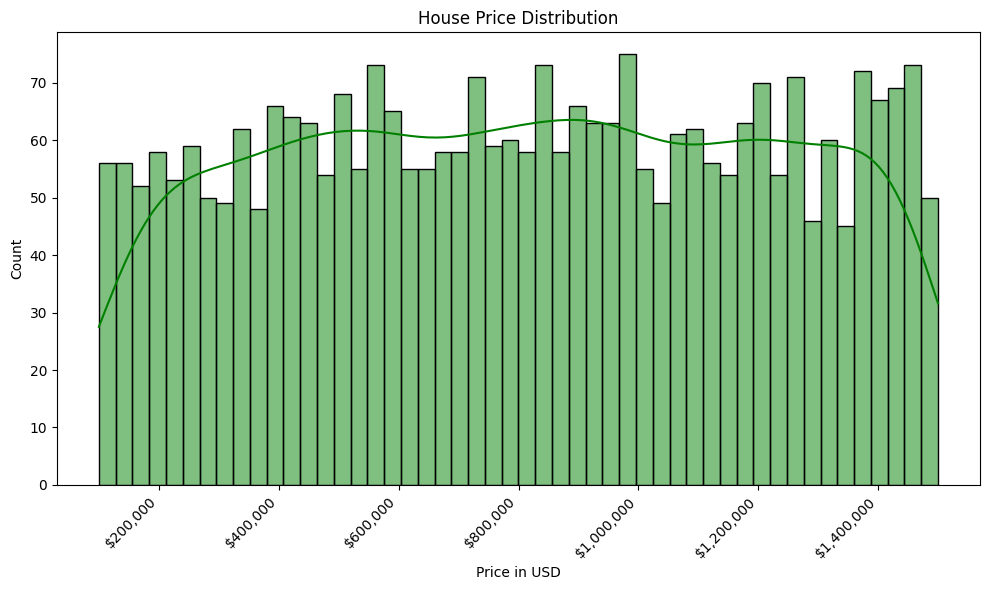

In [40]:
# Display min and max value in the price_in_usd column
print(f"Min price_in_usd: {hp['price_in_usd'].min()}")
print(f"Max price_in_usd: {hp['price_in_usd'].max()}")

if hp.empty:
    print("No data available for to plot price_in_usd.")
else:
    print("\nHistogram for price distribution:")
    plt.figure(figsize=(10, 6))
    sns.histplot(hp["price_in_usd"], color="green", bins=50, kde=True)
    plt.xlabel("Price in USD")
    plt.ylabel("Count")
    plt.ticklabel_format(style='plain', axis='x') # Prevents scientific notation by default if not using formatter
    plt.xticks(rotation=45, ha='right')
    plt.title("House Price Distribution")
    # Format x-axis ticks with commas (e.g., 200,000 instead of 0.2M)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.tight_layout()
    plt.show()

## 2. Average Price per Sqft

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

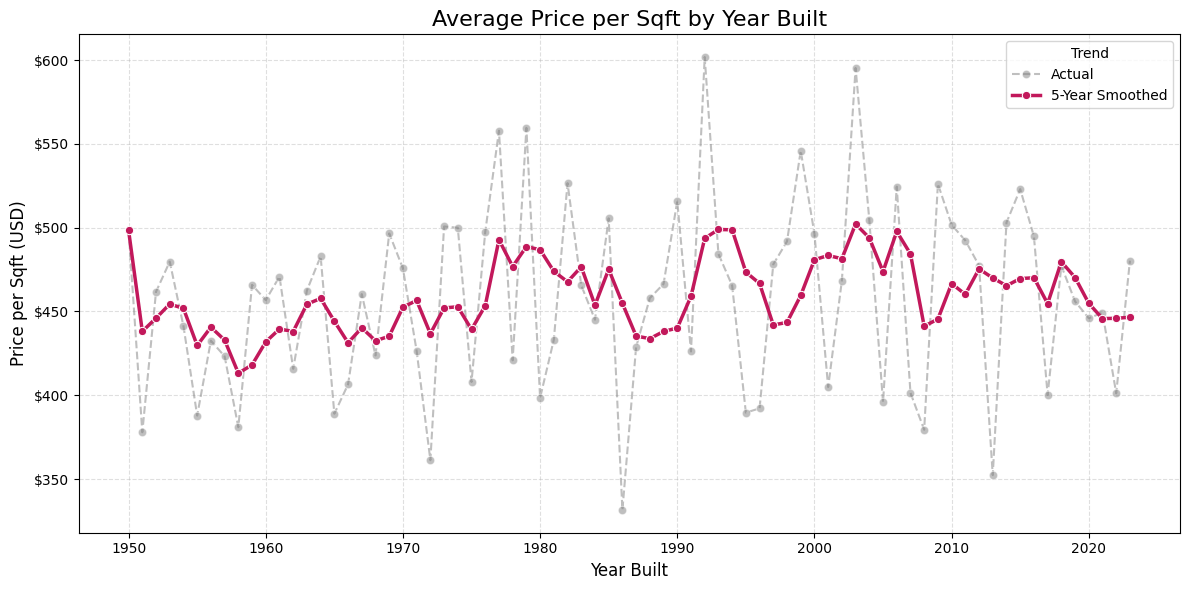

In [41]:
hp["price_per_sqft"] = hp["price_in_usd"] / hp["area_sqft"]

price_sqft_by_year = hp.groupby("Year_built")["price_per_sqft"].mean().reset_index()

# Smooth using 5-year rolling average
price_sqft_by_year["smoothed"] = (
    price_sqft_by_year["price_per_sqft"]
    .rolling(window=5, min_periods=1)
    .mean()
)

plt.figure(figsize=(12, 6))

# Raw dotted line
sns.lineplot(
    x="Year_built",
    y="price_per_sqft",
    data=price_sqft_by_year,
    label="Actual",
    linestyle="--",
    marker="o",
    color="gray",
    alpha=0.5
)

# Smoothed bold line
sns.lineplot(
    x="Year_built",
    y="smoothed",
    data=price_sqft_by_year,
    label="5-Year Smoothed",
    linewidth=2.5,
    color="#C2185B",
    marker="o"
)

plt.title("Average Price per Sqft by Year Built", fontsize=16)
plt.xlabel("Year Built", fontsize=12)
plt.ylabel("Price per Sqft (USD)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)

# Format y-axis to look like currency
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.legend(title="Trend", fontsize=10)
plt.tight_layout()
plt.show()

## 3. Price Distribution by Property Type

Min price_in_usd : 100283.0
Max price_in_usd : 1499473.0

 Violin plot for property type vs averaged price (USD):


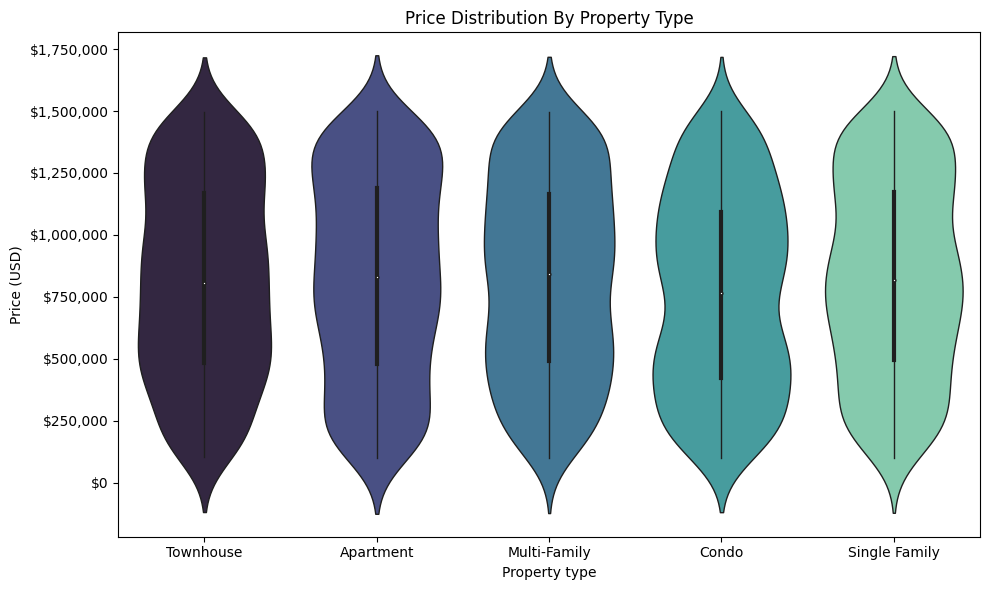

In [42]:
# Display min and max value in the price_in_usd column
print(f"Min price_in_usd : {hp['price_in_usd'].min()}")
print(f"Max price_in_usd : {hp['price_in_usd'].max()}")

if hp.empty:
    print("No data available to plot price_in_usd.")
else:
    print("\n Violin plot for property type vs averaged price (USD):")
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=hp, x="Property_type", y="price_in_usd", 
                   split = True, inner="box", linewidth=1, palette = "mako")
    plt.xlabel("Property type")
    plt.ylabel("Price (USD)")
    plt.title("Price Distribution By Property Type")

    # Format y-axis (price) with commas
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    
    plt.tight_layout()
    plt.show()

## 4. Average Price by Property Type


 Property Type VS Average Price (USD):


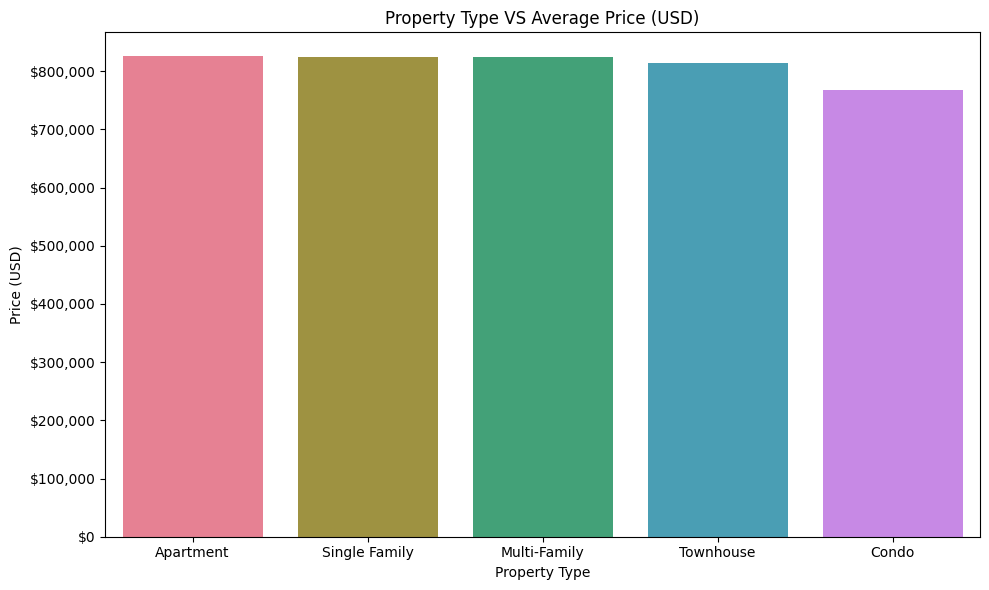

In [43]:
if hp.empty:
    print("No data available to plot.")
else:
    print("\n Property Type VS Average Price (USD):")
    plt.figure(figsize=(10, 6))

    # Group and sort
    property_type_vs_price = hp.groupby("Property_type")["price_in_usd"].mean().sort_values(ascending=False)

    # Plot using x=Series index, y=Series values
    sns.barplot(
        x=property_type_vs_price.index,
        y=property_type_vs_price.values,
        palette="husl"
    )

    plt.xlabel("Property Type")
    plt.ylabel("Price (USD)")
    plt.title("Property Type VS Average Price (USD)")

    # Format y-axis
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    plt.tight_layout()
    plt.show()


Note:
- ✅ If using raw DataFrame → use x="colname", y="colname", data=df
- ✅ If using Series → use x=series.index, y=series.values

## 5. Average Price by The Number of Bedrooms


 Bar plot for number of bedrooms vs average price (USD):


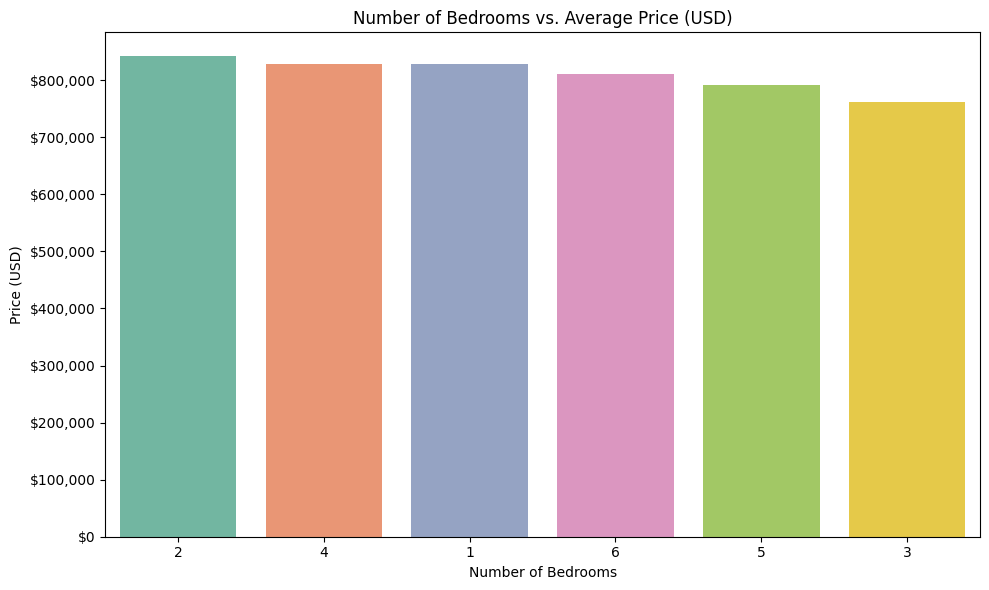

In [44]:
if hp.empty:
    print("No data available to plot.")
else:
    print("\n Bar plot for number of bedrooms vs average price (USD):")
    plt.figure(figsize=(10, 6))

    # Group and sort
    bedroom_vs_price = hp.groupby("num_of_bed")["price_in_usd"].mean().sort_values(ascending=False)

    # Plot with sorted order preserved
    sns.barplot(
        x=bedroom_vs_price.index,
        y=bedroom_vs_price.values,
        palette="Set2",
        order=bedroom_vs_price.index
    )

    plt.xlabel("Number of Bedrooms")
    plt.ylabel("Price (USD)")
    plt.title("Number of Bedrooms vs. Average Price (USD)")

    # Format y-axis
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    plt.tight_layout()
    plt.show()


## 6. Old vs New House Average Price Comparison


Average price of NEW houses (Year Built ≥ 2000): $803,580.54
Average price of OLD houses (Year Built < 2000): $814,428.26

 Old vs New House Price Comparison:


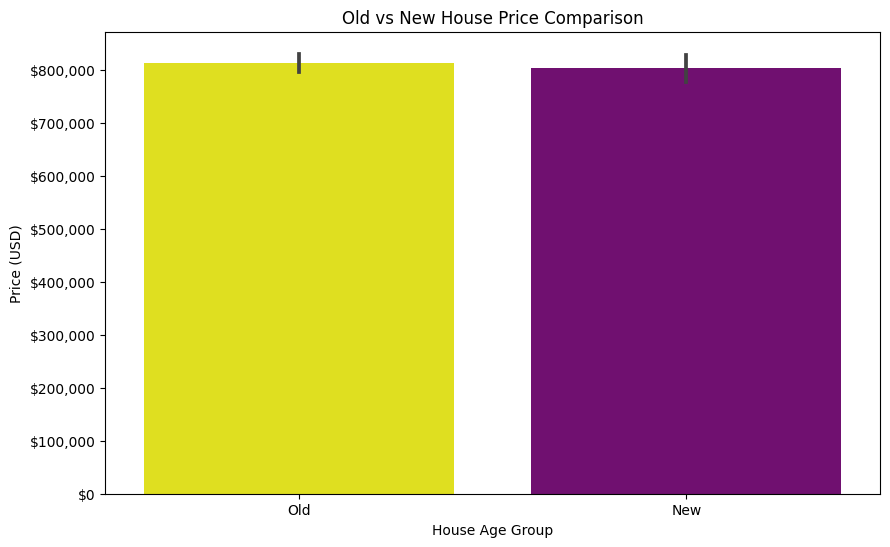

In [45]:
# Display the number of the old and the new  houses
houses_old_vs_new(hp)

if hp.empty:
    print("No data available to plot.")
else:
    print("\n Old vs New House Price Comparison:")
    plt.figure(figsize=(10, 6))

    # Add a new column
    hp["house_age_group"] = np.where(hp["Year_built"] >= 2000, "New", "Old")

    # Define a custom color palette
    custom_palette = {"New": "purple", "Old": "yellow"}

    sns.barplot(data=hp, x="house_age_group", y="price_in_usd", palette=custom_palette)

    plt.xlabel("House Age Group")
    plt.ylabel("Price (USD)")
    plt.title("Old vs New House Price Comparison")

    # y-axis formatting for price
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    plt.show()

## 7. City vs. Average Price


 City VS. Average Price Plot:


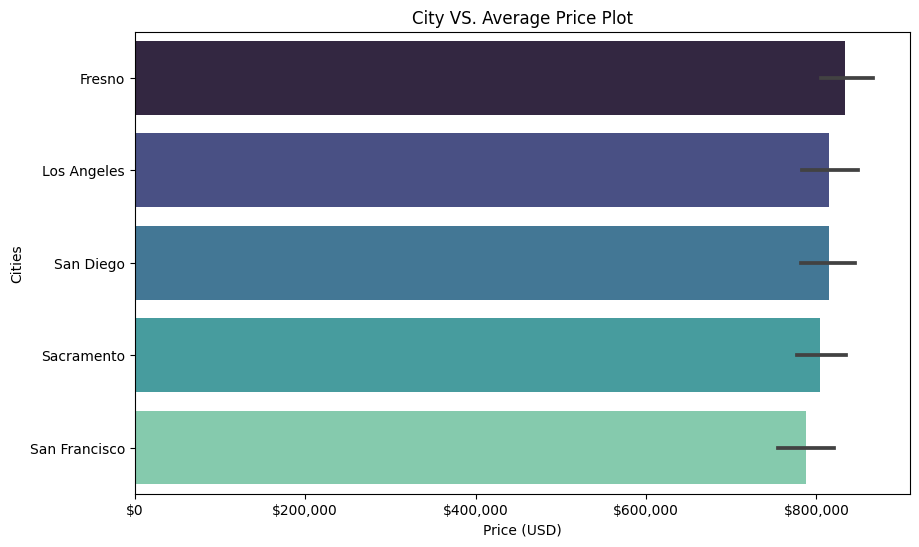

In [46]:
if hp.empty:
    print("No data available to plot price_in_usd.")
else:
    print("\n City VS. Average Price Plot:")
    plt.figure(figsize=(10, 6))

    # Calculate the mean price for each city and sort in descending order
    city_order = hp.groupby('City')['price_in_usd'].mean().sort_values(ascending=False).index

    sns.barplot(data=hp, x="price_in_usd", y="City", 
                estimator=np.mean, palette="mako", order=city_order)

    plt.xlabel("Price (USD)")
    plt.ylabel("Cities")
    plt.title("City VS. Average Price Plot")
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))
    plt.show()

## 8. Underpriced Property Highlights


 Underpriced properties in each city:


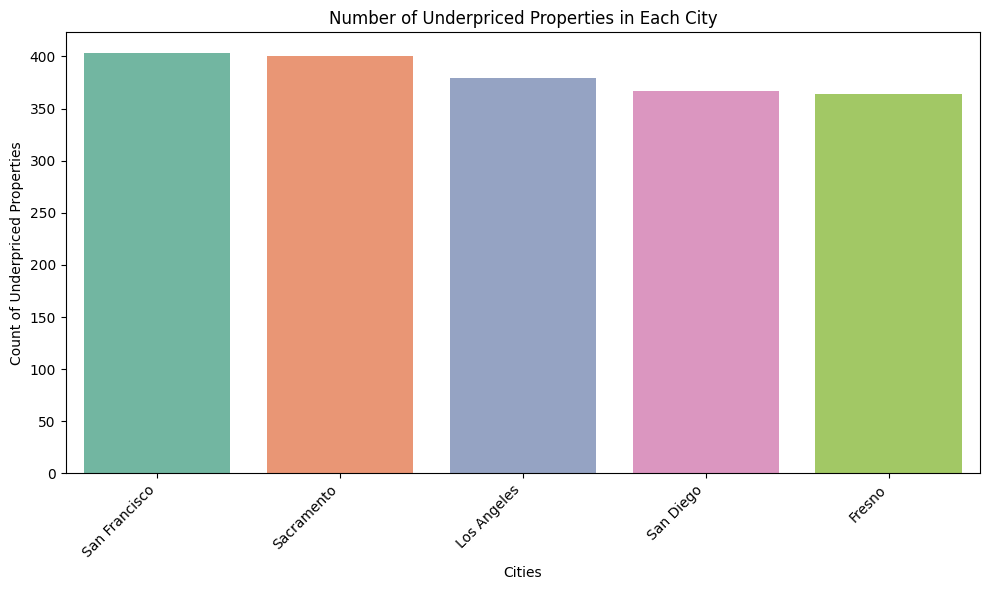

In [47]:
if hp.empty:
    print("No data available to plot.")
else:
    print("\n Underpriced properties in each city:")
    plt.figure(figsize=(10, 6))

    # Filter the data for 'underpriced' properties
    underpriced_df = hp[hp["underpriced"]].copy()

    # Calculate the count of underpriced properties per city and get the order
    if not underpriced_df.empty: 
        underpriced_city_counts = underpriced_df.groupby("City").size().sort_values(ascending=False)
        city_order_for_plot = underpriced_city_counts.index
    else:
        city_order_for_plot = []

    sns.countplot(data=underpriced_df, x="City", palette="Set2", order=city_order_for_plot)
    plt.xlabel("Cities")
    plt.ylabel("Count of Underpriced Properties")
    plt.title("Number of Underpriced Properties in Each City")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 9. Correlation Heatmap

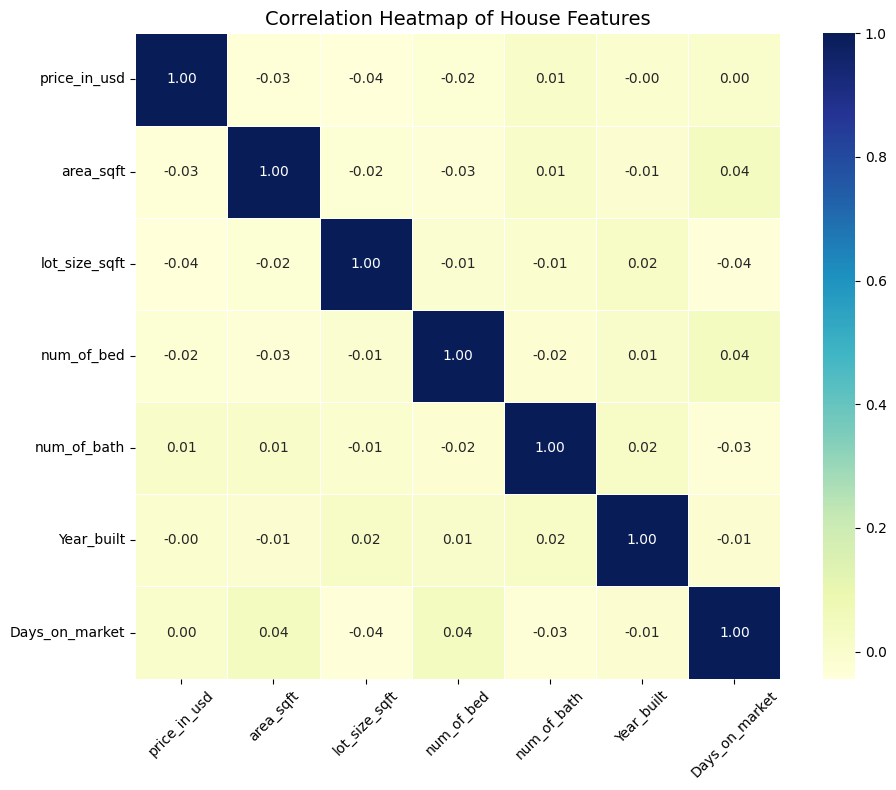

In [48]:
# Select columns
num_cols = [
    "price_in_usd",
    "area_sqft",
    "lot_size_sqft",
    "num_of_bed",
    "num_of_bath",
    "Year_built",
    "Days_on_market"
]

# Compute correlation matrix
corr_matrix = hp[num_cols].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, square=True)

plt.title("Correlation Heatmap of House Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 10. Property Type Distribution Over the Years

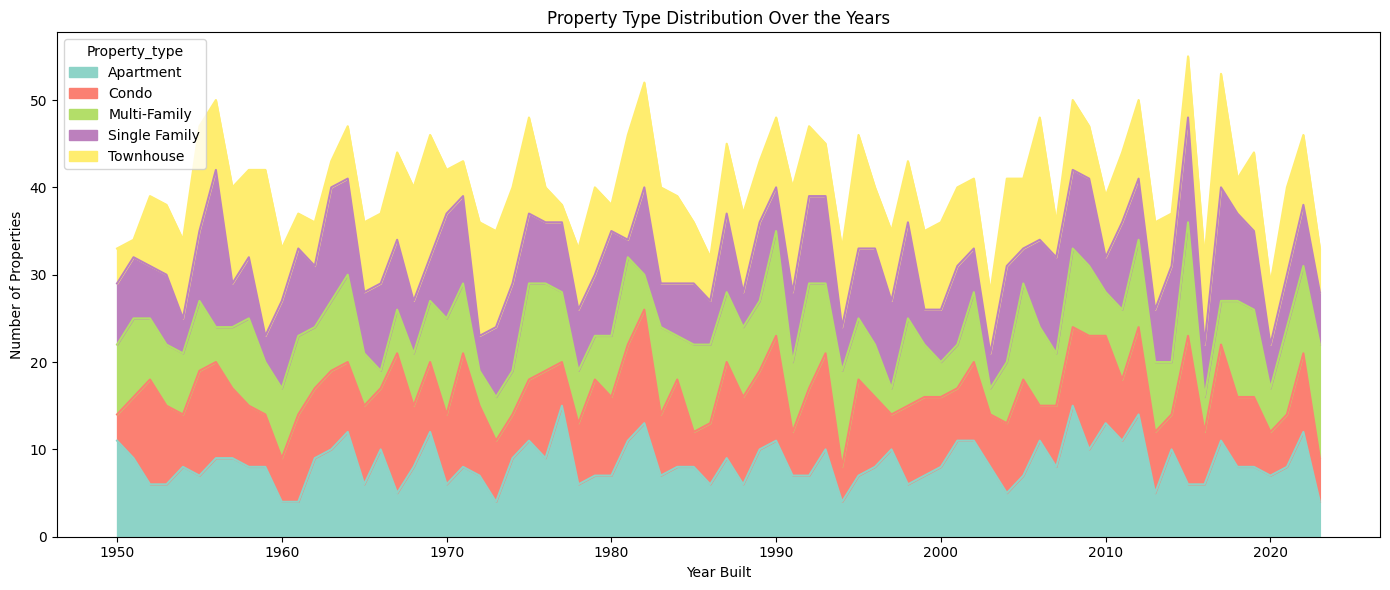

In [49]:
type_year = hp.groupby(["Year_built", "Property_type"]).size().unstack().fillna(0)

type_year.plot(kind="area", stacked=True, figsize=(14,6), colormap="Set3")
plt.title("Property Type Distribution Over the Years")
plt.xlabel("Year Built")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()


## 11. House Price Trends

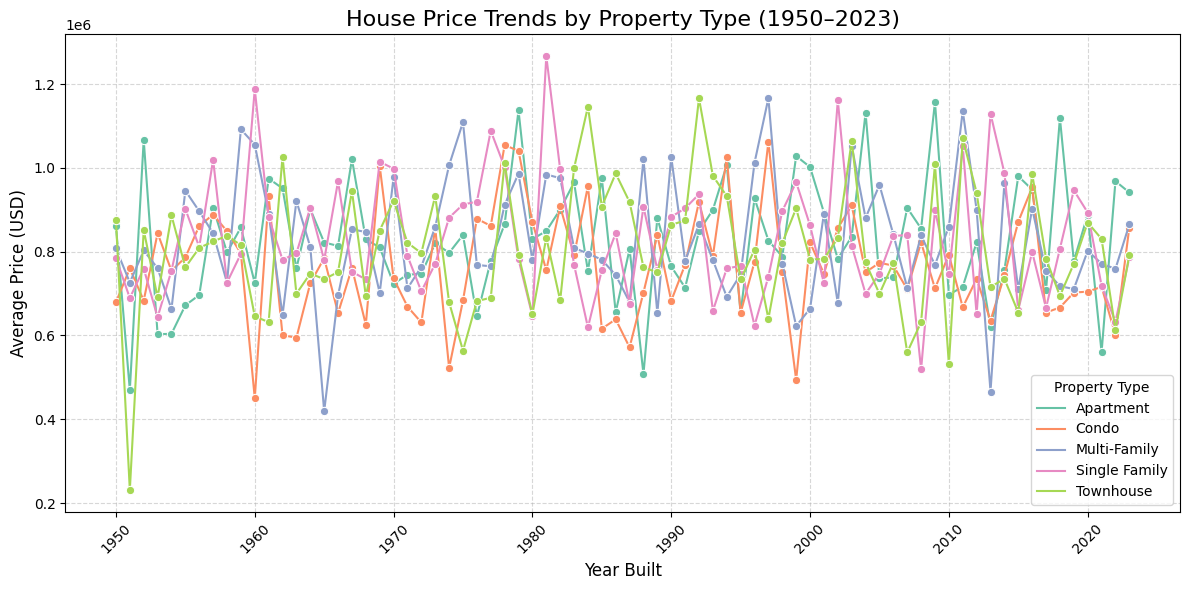

In [50]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)

    # Group by Year Built and Property Type, calculate average price
    price_trend = (
        hp.groupby(["Year_built", "Property_type"])["price_in_usd"]
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=price_trend,
        x="Year_built",
        y="price_in_usd",
        hue="Property_type",
        marker="o",
        palette="Set2"
    )

    plt.title("House Price Trends by Property Type (1950–2023)", fontsize=16)
    plt.xlabel("Year Built", fontsize=12)
    plt.ylabel("Average Price (USD)", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(title="Property Type")
    plt.tight_layout()
    plt.show()

## Bonus: Price vs Area Scatter Plot

Min price_in_usd : 100283.0
Max price_in_usd : 1499473.0
Min Area (Sqft) : 600.0
Max Area (Sqft) : 3999.0

 Scatter plot for Price vs Area:


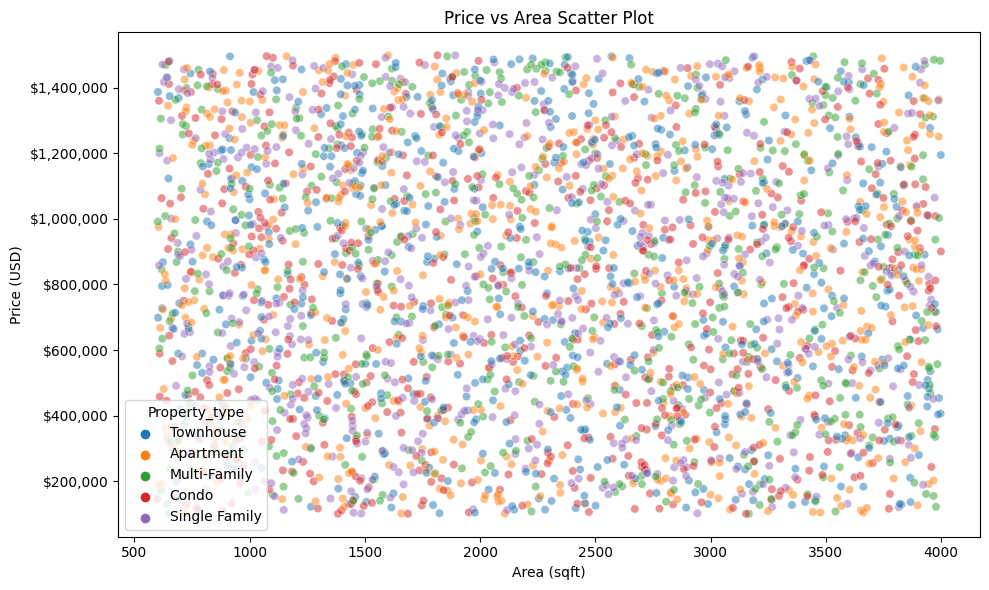

In [51]:
# Display min and max value in the price_in_usd column
print(f"Min price_in_usd : {hp['price_in_usd'].min()}")
print(f"Max price_in_usd : {hp['price_in_usd'].max()}")
print(f"Min Area (Sqft) : {hp['area_sqft'].min()}")
print(f"Max Area (Sqft) : {hp['area_sqft'].max()}")

if hp.empty:
    print("No data available to plot price_in_usd.")
else:
    print("\n Scatter plot for Price vs Area:")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=hp, x="area_sqft", y="price_in_usd", 
                    hue="Property_type", alpha=0.5)
    plt.xlabel("Area (sqft)")
    plt.ylabel("Price (USD)")
    plt.title("Price vs Area Scatter Plot")

    # Format y-axis (price) with commas
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:,.0f}"))

    # Prevent scientific notation on x-axis (area)
    plt.ticklabel_format(style='plain', axis='x')
    
    plt.tight_layout()
    plt.show()

# Machine Learning Model

## Copy and get the overview of the dataframe

In [52]:
df_ml = hp.copy()
df_ml.sample(5)

,Address,City,Zipcode,State,Year_built,Days_on_market,Property_type,MLS_ID,Listing_agent,Status,...,num_of_bed,num_of_bath,area_sqft,lot_size_sqft,Street,price_per_sqft,expected_price_per_sqft,underpriced,underpricing_gap,house_age_group
2633,"7840 Maple Dr, Sacramento, NY 79679",Sacramento,79679,CA,1959,67,Townhouse,Z754316,Jane Smith - Keller Williams,Pending,...,1,4,917.0,3505.0,7840 Maple Dr,607.194111,454.794825,False,-152.399286,Old
2982,"2261 Maple Dr, Fresno, IL 60525",Fresno,60525,CA,2020,23,Single Family,Z197275,John Doe - RE/MAX,Pending,...,2,3,2079.0,5705.0,2261 Maple Dr,662.455026,472.287438,False,-190.167588,New
636,"6824 Oak Ave, Sacramento, IL 72726",Sacramento,72726,CA,1992,92,Condo,Z956416,Emily Davis - Century 21,For Sale,...,3,3,1983.0,7846.0,6824 Oak Ave,416.199697,438.055811,True,21.856113,Old
1260,"9109 Maple Dr, Los Angeles, IL 64628",Los Angeles,64628,CA,1976,101,Single Family,Z809289,Alex Johnson - Compass,Sold,...,2,4,2580.0,3464.0,9109 Maple Dr,122.338760,472.287438,True,349.948678,Old
799,"555 Main St, Sacramento, TX 97031",Sacramento,97031,CA,1955,4,Townhouse,Z176504,Emily Davis - Century 21,For Sale,...,3,1,650.0,2740.0,555 Main St,156.966154,454.794825,True,297.828671,Old


In [53]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Address                  3000 non-null   string 
 1   City                     3000 non-null   string 
 2   Zipcode                  3000 non-null   int64  
 3   State                    3000 non-null   object 
 4   Year_built               3000 non-null   int64  
 5   Days_on_market           3000 non-null   int64  
 6   Property_type            3000 non-null   string 
 7   MLS_ID                   3000 non-null   string 
 8   Listing_agent            3000 non-null   string 
 9   Status                   3000 non-null   string 
 10  Listing_URL              3000 non-null   string 
 11  price_in_usd             3000 non-null   float64
 12  num_of_bed               3000 non-null   int64  
 13  num_of_bath              3000 non-null   int64  
 14  area_sqft               

## Data preprocessing for ML

In [54]:
def preprocess(filepath_or_buffer = house_price):
    """prepares and transforms the dataframe"""

    # change data types
    dtype_mapper = {"Address" : "string",
                    "City": "category",
                    "State" : "category",
                    "Bedrooms" : "string",
                    "Bathrooms" : "string",
                    "Area (Sqft)" : "string",
                    "Lot Size" : "string",
                    "Property Type" : "category",
                    "MLS ID" : "string",
                    "Listing Agent" : "category",
                    "Status" : "category",
                    "Listing URL" : "string"}

    # change columns names
    mapper = {"Area (Sqft)" : "Area_sqft",
              "Lot Size" : "Lot_size",
              "Year Built" : "Year_built",
              "Days on Market" : "Days_on_market",
              "Property Type" : "Property_type",
              "MLS ID" : "MLS_ID",
              "Listing Agent" : "Listing_agent",
              "Listing URL" : "Listing_URL"}

    # reassign the state values
    correct_state_map = {"Fresno": "CA",
                         "Los Angeles": "CA",
                         "Sacramento": "CA",
                         "San Diego": "CA",
                         "San Francisco": "CA",
                         "Anytown": "CA"} # Added Anytown from dummy data

    # change data type
    df = pd.read_csv(filepath_or_buffer, dtype = dtype_mapper) if isinstance(filepath_or_buffer, str) else filepath_or_buffer.copy()
    df = df.rename(columns = mapper)

    # Format columns
    df["price_in_usd"] = df["Price"].replace({'\$': '', ',': ''}, regex=True).astype(float)
    df["num_of_bed"] = df["Bedrooms"].str.extract(r'(\d+)').astype(int)
    df["num_of_bath"] = df["Bathrooms"].str.extract(r'([\d\.]+)').astype(int) # This was int, might need float if bathrooms can be .5
    df["area_sqft"] = df["Area_sqft"].str.replace('sqft', '').str.replace(',', '').str.strip().astype(float)
    df["lot_size_sqft"] = df["Lot_size"].str.replace('sqft', '').str.replace(',', '').str.strip().astype(float)
    df["Street"] = df["Address"].str.split(',').str[0].str.strip()
    df.drop(columns=["Price", "Bedrooms", "Bathrooms", "Area_sqft", "Lot_size"], inplace=True)

    # Apply correct_state_map mapping to fix mismatched state values
    df["correct_state"] = df["City"].map(correct_state_map)
    df["State"] = df["correct_state"]
    df.drop(columns="correct_state", inplace=True)
    
    # Log Transform
    df["log_price"] = np.log1p(df["price_in_usd"])

    # Drop columns that are no longer useful as features
    # 'price_in_usd' is now a feature for regression, but for classification it's not relevant
    # 'Status' will be used to create 'is_sold', then 'Status' itself should be dropped from features
    columns_to_drop = ["Address", "Zipcode", "Listing_URL", "MLS_ID", "Listing_agent", "Street", "State", "price_in_usd"]
    existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
    if existing_cols_to_drop:
        df = df.drop(columns=existing_cols_to_drop, axis=1)
    else:
        print("Warning: None of the specified columns to drop were found.")

    # Create the new target variable 'is_sold' BEFORE OHE 'Status'
    df['is_sold'] = (df['Status'] == 'Sold').astype(int)

    # One Hot Encoder part:  Define the columns you want to encode
    categorical_cols = ["City", "Property_type"]

    # Set up the encoder with drop='first'
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop='first').set_output(transform="pandas")

    # Fit and transform the categorical columns
    ohe_transformed = ohe.fit_transform(df[categorical_cols])

    # Combine with original dataframe (drop the original categorical columns)
    # Also drop the original 'Status' column from the features here
    df = pd.concat([df.drop(columns=categorical_cols + ['Status']), ohe_transformed], axis=1) # Drop original 'Status' column


    # Reorder the column for ML (moving 'is_sold' to last)
    if "is_sold" in df.columns:
        cols = [col for col in df.columns if col != "is_sold"]
        cols.append("is_sold")
        df = df[cols]
    else:
        print("Error: 'is_sold' column not found in DataFrame after preprocessing.")

    return df

In [55]:
hpml = preprocess()
print("\nProcessed DataFrame head for classification:")
hpml.sample(10)


Processed DataFrame head for classification:


,Year_built,Days_on_market,num_of_bed,num_of_bath,area_sqft,lot_size_sqft,log_price,City_Los Angeles,City_Sacramento,City_San Diego,City_San Francisco,Property_type_Condo,Property_type_Multi-Family,Property_type_Single Family,Property_type_Townhouse,is_sold
273,2012,98,1,4,1173.0,7073.0,14.131282,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
593,1971,114,3,4,1072.0,7750.0,13.970976,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1322,1984,27,2,1,3860.0,2508.0,12.646847,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1902,2010,59,5,2,2370.0,7058.0,13.665983,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
584,1975,86,5,3,3996.0,1151.0,14.209317,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
664,1971,58,3,1,2100.0,3409.0,13.590987,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1515,2019,113,3,2,2728.0,9079.0,13.266599,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
333,2017,47,2,1,3663.0,8176.0,12.565414,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2177,1957,89,5,3,885.0,8073.0,13.550397,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
2709,1997,63,4,3,2294.0,7350.0,12.599958,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


In [56]:
selected_columns = [
    "Year_built",
    "Days_on_market",
    "num_of_bed", # Corrected the duplicate 'num_of_bed'
    "num_of_bath", # Added num_of_bath based on your usual features
    "area_sqft",
    "lot_size_sqft"
]

# Select and show only the desired columns
hpml[selected_columns].sample(10)

,Year_built,Days_on_market,num_of_bed,num_of_bath,area_sqft,lot_size_sqft
2182,1950,73,4,1,1484.0,1302.0
1757,2002,108,6,2,3122.0,3886.0
1821,2022,22,1,1,1055.0,8615.0
1668,2012,88,6,1,3467.0,4404.0
1868,1978,107,3,2,2570.0,8129.0
118,1971,71,4,2,2154.0,9985.0
2564,2021,19,1,3,1885.0,4141.0
2434,1990,120,6,3,2441.0,3137.0
780,1951,67,3,2,2742.0,2878.0
1713,1984,40,1,2,1022.0,9197.0


In [57]:
print(f"Shape of processed DataFrame: {hpml.shape}")
print(hpml['is_sold'].value_counts()) # Check distribution of your new target

Shape of processed DataFrame: (3000, 16)
is_sold
0    1955
1    1045
Name: count, dtype: int64


In [58]:
print(hpml.columns)

Index(['Year_built', 'Days_on_market', 'num_of_bed', 'num_of_bath',
       'area_sqft', 'lot_size_sqft', 'log_price', 'City_Los Angeles',
       'City_Sacramento', 'City_San Diego', 'City_San Francisco',
       'Property_type_Condo', 'Property_type_Multi-Family',
       'Property_type_Single Family', 'Property_type_Townhouse', 'is_sold'],
      dtype='object')


In [59]:
print(f"Shape of processed DataFrame: {hpml.shape}")
print(hpml['is_sold'].value_counts())

Shape of processed DataFrame: (3000, 16)
is_sold
0    1955
1    1045
Name: count, dtype: int64


In [60]:
hpml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year_built                   3000 non-null   int64  
 1   Days_on_market               3000 non-null   int64  
 2   num_of_bed                   3000 non-null   int64  
 3   num_of_bath                  3000 non-null   int64  
 4   area_sqft                    3000 non-null   float64
 5   lot_size_sqft                3000 non-null   float64
 6   log_price                    3000 non-null   float64
 7   City_Los Angeles             3000 non-null   float64
 8   City_Sacramento              3000 non-null   float64
 9   City_San Diego               3000 non-null   float64
 10  City_San Francisco           3000 non-null   float64
 11  Property_type_Condo          3000 non-null   float64
 12  Property_type_Multi-Family   3000 non-null   float64
 13  Property_type_Sing

Note: 
- Using .astype('string') for consistency with your prompt,
- but .astype('category') is often better for memory if unique values are limited.

## Feature Selection

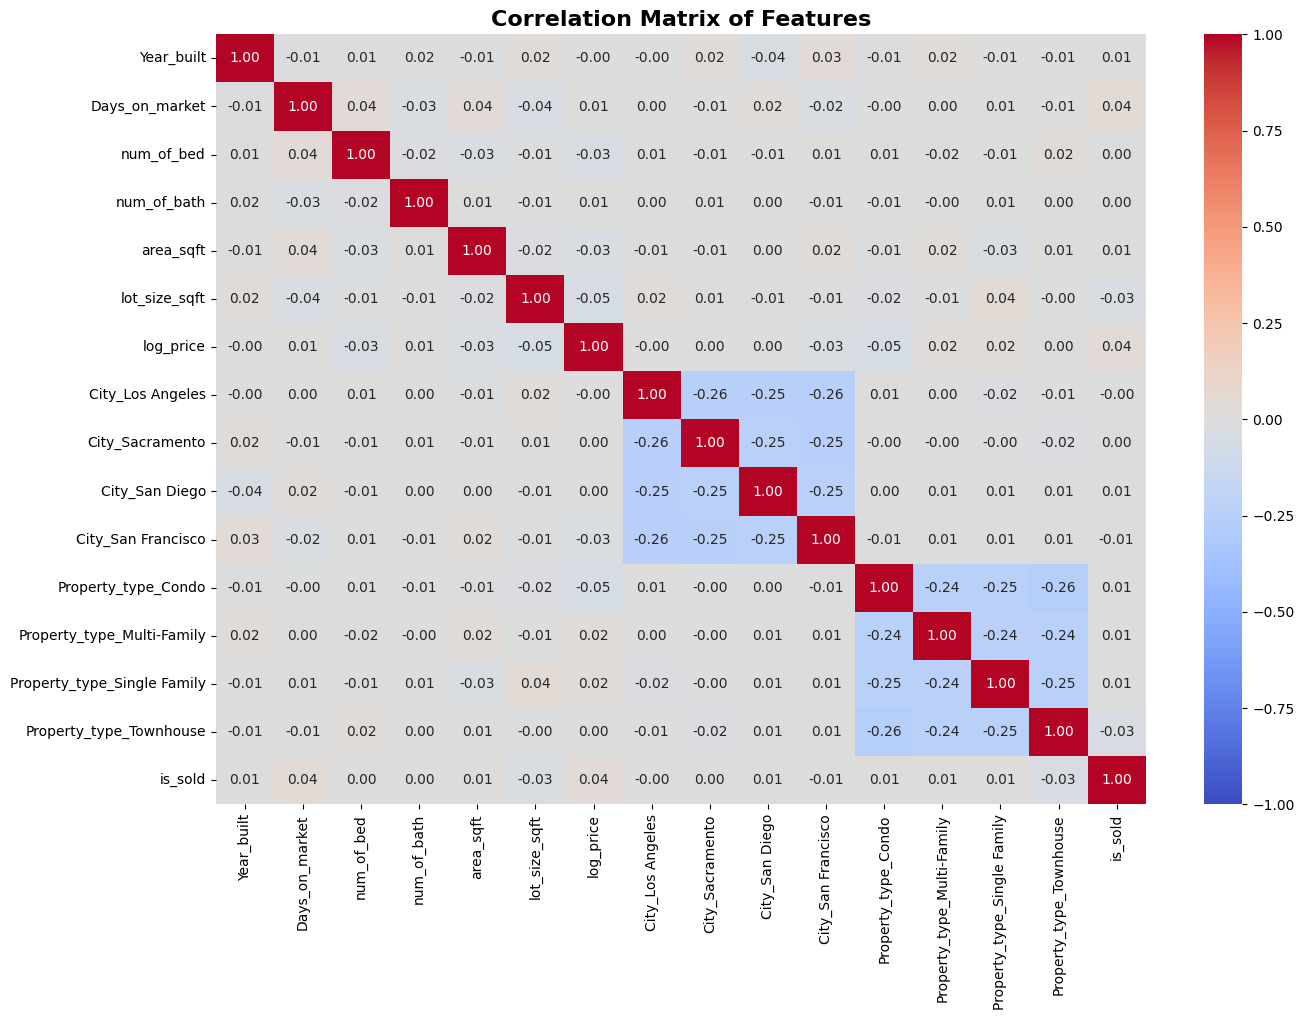

In [61]:
CorrMat = hpml.corr()
plt.figure(figsize = (15,10))
sns.heatmap(CorrMat, annot = True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features", fontsize=16, fontweight='bold')
plt.show()

## Variance inflation factor (VIF)

In [62]:
# Check for multicollinearity by calculating VIF
# Remove columns that have the same value everywhere (constant columns)
constant_cols = [col for col in hpml.columns if hpml[col].nunique() == 1]

# Select only numeric columns
numeric_cols = hpml.select_dtypes(include = [np.number]).columns
X = hpml[numeric_cols]

# Add a constant column for the regression intercept
X = add_constant(X)

# Calculate VIF for each column
vif_scores = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame({"Feature": X.columns, "VIF": vif_scores})
print("VIF Data:")
print(vif_df)

VIF Data:
                        Feature          VIF
0                         const  9234.793795
1                    Year_built     1.004220
2                Days_on_market     1.008246
3                    num_of_bed     1.004959
4                   num_of_bath     1.002015
5                     area_sqft     1.005726
6                 lot_size_sqft     1.007933
7                     log_price     1.010421
8              City_Los Angeles     1.636849
9               City_Sacramento     1.631253
10               City_San Diego     1.617479
11           City_San Francisco     1.633349
12          Property_type_Condo     1.587058
13   Property_type_Multi-Family     1.551501
14  Property_type_Single Family     1.566340
15      Property_type_Townhouse     1.584951
16                      is_sold     1.005805


General VIF Thresholds:

- VIF < 5: Generally considered acceptable, indicating low multicollinearity.

- 5 < VIF < 10: Moderate multicollinearity, might warrant investigation.

- VIF > 10: High multicollinearity, strongly suggests dropping or transforming features.

## Outlier handling

In [63]:
# Define threshold: If outliers in a column make up less than 5% of total rows, remove them
outlier_threshold = 0.05

# Identify numerical columns with more than 2 unique values (continuous-like variables)
numeric_cols = hpml.select_dtypes(include=[np.number]).columns
continuous_cols = [col for col in numeric_cols if hpml[col].nunique() > 2]

# Exclude target variable 'price_in_usd' from outlier detection because it's the target.
# Typically handle target outliers separately or not remove rows based on them.
if 'price_in_usd' in continuous_cols:
    continuous_cols.remove('price_in_usd')

# Store row indices of outliers to remove
outlier_rows = set()

# A good practice to create a copy to iterate through if you plan to modify it inside the loop
df_for_outliers = hpml.copy()

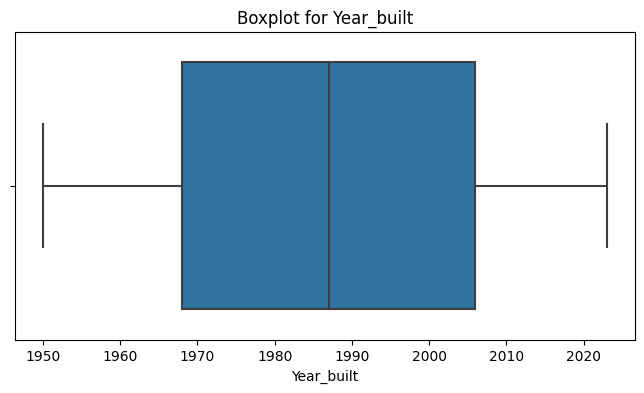

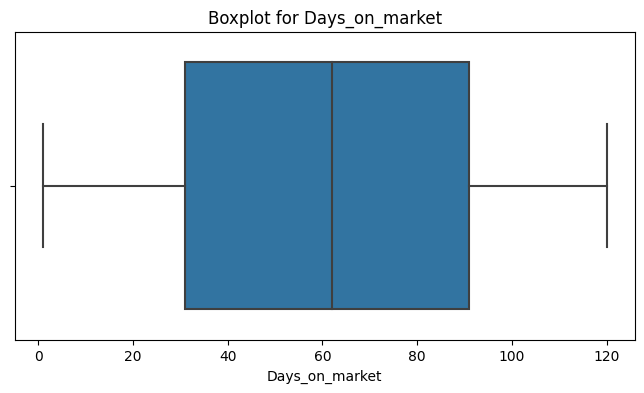

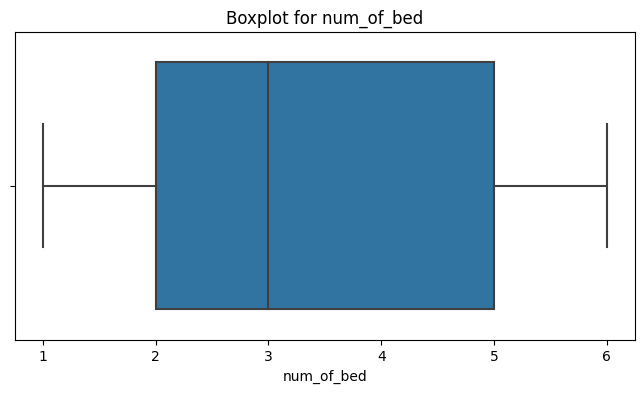

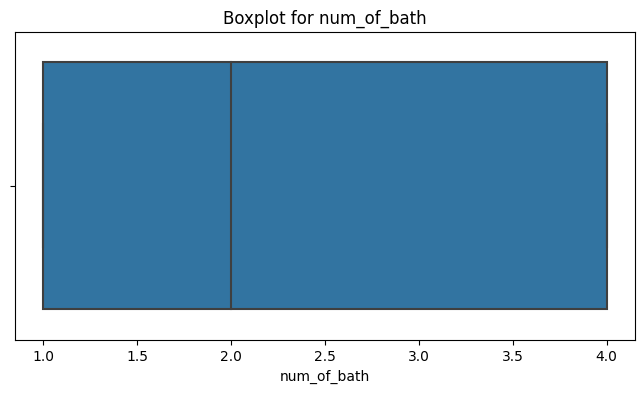

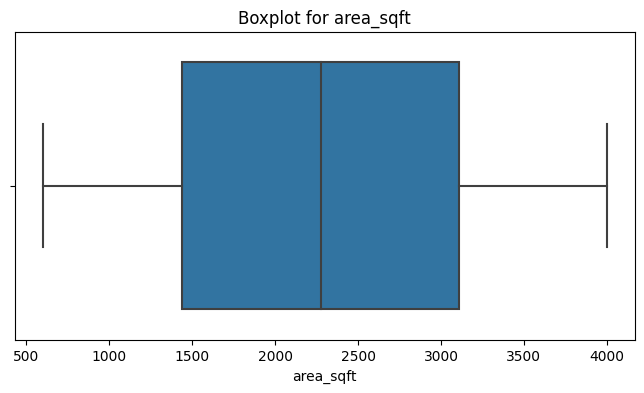

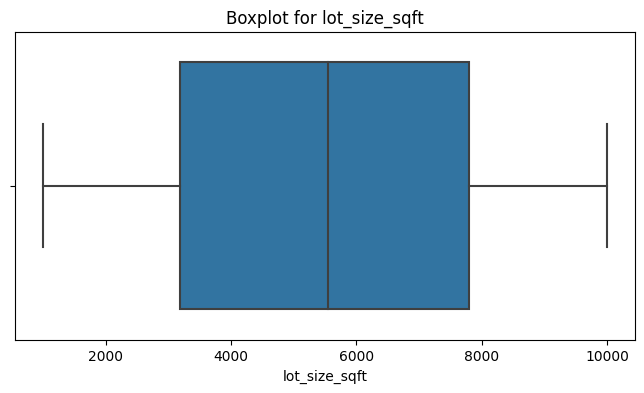

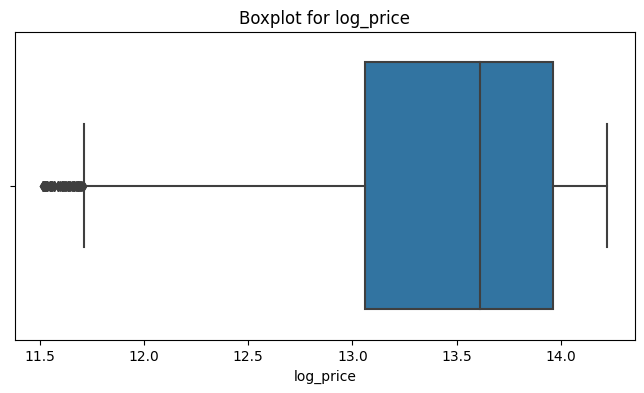

In [64]:
for col in continuous_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=hpml[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [65]:
for col in continuous_cols:
    # Compute IQR (Interquartile Range)
    Q1 = df_for_outliers[col].quantile(0.25)
    Q3 = df_for_outliers[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Find outlier row indices
    outliers_in_col = df_for_outliers[(df_for_outliers[col] < lower_limit) | (df_for_outliers[col] > upper_limit)].index

    # Check the threshold and collect indices
    if len(outliers_in_col) < outlier_threshold * len(df_for_outliers):
        outlier_rows.update(outliers_in_col)
        print(f"{col}: {len(outliers_in_col)} outliers (Removed)")
    else:
        print(f"{col}: {len(outliers_in_col)} outliers (Retained due to threshold)")

# Remove all flagged rows
hpml = hpml.drop(index=list(outlier_rows))

print(f"\nTotal rows removed: {len(outlier_rows)}")
print("\nCleaned DataFrame shape:")
print(hpml.shape)

Year_built: 0 outliers (Removed)
Days_on_market: 0 outliers (Removed)
num_of_bed: 0 outliers (Removed)
num_of_bath: 0 outliers (Removed)
area_sqft: 0 outliers (Removed)
lot_size_sqft: 0 outliers (Removed)
log_price: 45 outliers (Removed)

Total rows removed: 45

Cleaned DataFrame shape:
(2955, 16)


In [66]:
# outlier summary
outlier_summary = []

for col in continuous_cols:
    outlier_summary.append({
        "Column": col,
        "Outliers Removed": len(outliers_in_col),
        "Threshold Triggered": len(outliers_in_col) < outlier_threshold * len(df_for_outliers)
    })

pd.DataFrame(outlier_summary)

,Column,Outliers Removed,Threshold Triggered
0,Year_built,45,True
1,Days_on_market,45,True
2,num_of_bed,45,True
3,num_of_bath,45,True
4,area_sqft,45,True
5,lot_size_sqft,45,True
6,log_price,45,True


## Feature Scaling

In [67]:
# 1. Separate features (X) and target (y)
X = hpml.iloc[:, :-1]
y = hpml.iloc[:, -1]

# 2. Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# 3. Identify numerical columns to scale
numerical_features_to_scale = [
    'Year_built', 'Days_on_market', 'num_of_bed', 'num_of_bath',
    'area_sqft', 'lot_size_sqft', "log_price"
]
numerical_features_to_scale = [col for col in numerical_features_to_scale if col in X_train.columns]

# 4. Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_val_scaled[numerical_features_to_scale] = scaler.transform(X_val[numerical_features_to_scale])
X_test_scaled[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])

X_train_val_scaled = pd.concat([X_train_scaled, X_val_scaled], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

# 5. Check that scaling worked
print("\nMean of a scaled column (should be close to 0):", X_train_scaled['area_sqft'].mean())
print("Standard Deviation of a scaled column (should be close to 1):", X_train_scaled['area_sqft'].std())



Mean of a scaled column (should be close to 0): -6.812874510954147e-17
Standard Deviation of a scaled column (should be close to 1): 1.0002821272449984


## Model Training: Logistic Regression

In [68]:
# Train Logistic Regression on combined training + validation set
log_reg_classifier = LogisticRegression(random_state=42, solver='liblinear', max_iter=200, class_weight='balanced')
log_reg_classifier.fit(X_train_val_scaled, y_train_val)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=42,
                   solver='liblinear')

In [69]:
# 1. Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Initialize the Logistic Regression Model
log_reg_classifier = LogisticRegression(
    random_state=42, 
    solver='liblinear', 
    max_iter=200, 
    class_weight='balanced'
)

# 3. Define hyperparameters to tune
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# 4. GridSearchCV with StratifiedKFold
grid_search_log_reg = GridSearchCV(
    estimator=log_reg_classifier,
    param_grid=param_grid_log_reg,
    cv=skf,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# 5. Fit using only training data
grid_search_log_reg.fit(X_train_scaled, y_train)

# Print results
print("\n--- Logistic Regression GridSearchCV Results ---")
print(f"Best parameters: {grid_search_log_reg.best_params_}")
print(f"Best cross-validation F1-score: {grid_search_log_reg.best_score_:.4f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits

--- Logistic Regression GridSearchCV Results ---
Best parameters: {'C': 0.001, 'penalty': 'l2'}
Best cross-validation F1-score: 0.4241


In [70]:
# Final test evaluation
final_log_reg_model = grid_search_log_reg.best_estimator_
y_pred_test_lr = final_log_reg_model.predict(X_test_scaled)
y_pred_proba_test_lr = final_log_reg_model.predict_proba(X_test_scaled)[:, 1]

print("\nFinal Test Set Evaluation (Logistic Regression):")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_test_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test_lr):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_test_lr):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_test_lr):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred_proba_test_lr):.4f}")


Final Test Set Evaluation (Logistic Regression):
Accuracy:  0.4958
Precision: 0.3508
Recall:    0.5169
F1-Score:  0.4180
ROC AUC:   0.5026


<Figure size 600x400 with 0 Axes>

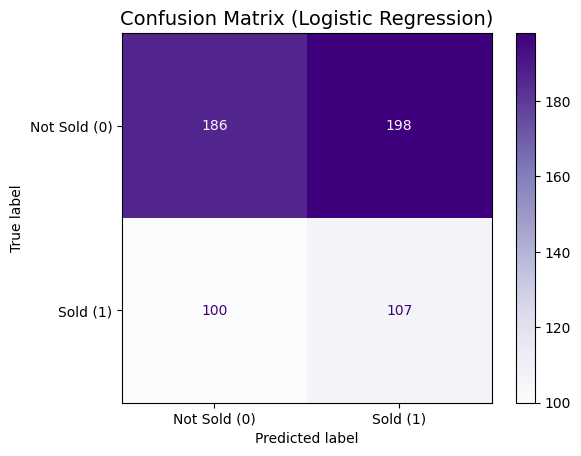

In [71]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_test_lr, labels=final_log_reg_model.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Not Sold (0)', 'Sold (1)'])

plt.figure(figsize=(6, 4))
disp_lr.plot(cmap=plt.cm.Purples, values_format='d')
plt.title("Confusion Matrix (Logistic Regression)", fontsize=14)
plt.grid(False)
plt.show()


## Model Training: RandomForestClassifier

In [72]:
# Define the model
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
rf_classifier.fit(X_train_val_scaled, y_train_val)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [73]:
# Define Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
rf_classifier = RandomForestClassifier(
    random_state=42, 
    class_weight='balanced', 
    n_jobs=-1
)

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV using only the training set
grid_search_rf = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    cv=skf,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Fit to training data (no val or test involved here!)
grid_search_rf.fit(X_train_scaled, y_train)

# Display best parameters and score
print("\n--- Random Forest GridSearchCV Results ---")
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Best cross-validation F1-score: {grid_search_rf.best_score_:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- Random Forest GridSearchCV Results ---
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation F1-score: 0.2444


In [74]:
# Evaluate the best model on the test set
final_rf_model = grid_search_rf.best_estimator_
y_pred_test_rf = final_rf_model.predict(X_test_scaled)
y_pred_proba_test_rf = final_rf_model.predict_proba(X_test_scaled)[:, 1]

print("\nFinal Test Set Evaluation (Random Forest):")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_test_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_test_rf):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_test_rf):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred_test_rf):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred_proba_test_rf):.4f}")



Final Test Set Evaluation (Random Forest):
Accuracy:  0.6024
Precision: 0.3772
Recall:    0.2077
F1-Score:  0.2679
ROC AUC:   0.5135


<Figure size 600x400 with 0 Axes>

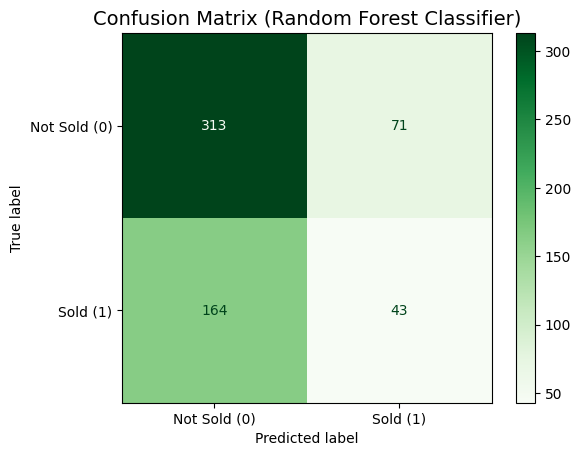

In [75]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_test_rf, labels=final_rf_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Sold (0)', 'Sold (1)'])

plt.figure(figsize=(6, 4))
disp_rf.plot(cmap=plt.cm.Greens, values_format='d')
plt.title("Confusion Matrix (Random Forest Classifier)", fontsize=14)
plt.grid(False)
plt.show()


## Model Training: SVM

In [76]:
# Define the model with class balancing
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Train on training + validation set
svm_grid_search.fit(X_train_val_scaled, y_train_val)

# Get best estimator
best_svm = svm_grid_search.best_estimator_

print(f"\nBest Parameters: {svm_grid_search.best_params_}")
print(f"Best F1 Score (CV): {svm_grid_search.best_score_:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Best F1 Score (CV): 0.5169


In [77]:
# Predict on test set
y_pred_svm = best_svm.predict(X_test_scaled)
y_pred_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

# Evaluation metrics
print("\nSVM Test Set Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_svm):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_pred_proba_svm):.4f}")


SVM Test Set Performance:
Accuracy:  0.3486
Precision: 0.3455
Recall:    0.9614
F1 Score:  0.5083
ROC AUC:   0.5210


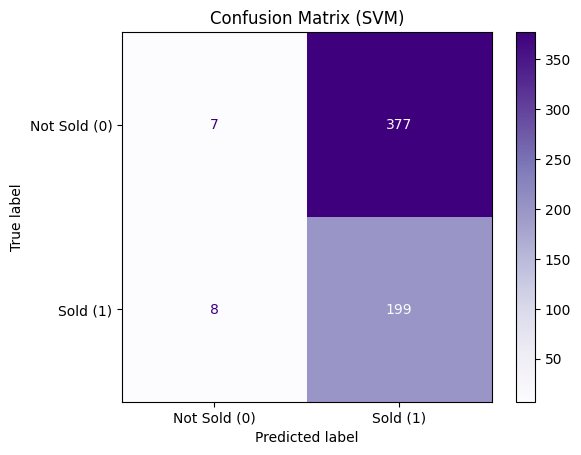

In [78]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=best_svm.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Not Sold (0)', 'Sold (1)'])
disp_svm.plot(cmap=plt.cm.Purples)
plt.title('Confusion Matrix (SVM)')
plt.show()

## Model Training: XGBoost

In [79]:
# import the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [80]:
# Set up the hyperparameter grid:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

# Perform grid search:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             scoring='f1', verbose=1)

In [81]:
# Evaluate the model's performance
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.82      0.72       384
           1       0.34      0.17      0.23       207

    accuracy                           0.59       591
   macro avg       0.49      0.49      0.47       591
weighted avg       0.54      0.59      0.55       591



## Models' summary

- **Logistic regression**


Despite feature engineering and hyperparameter tuning, the Logistic Regression model is showing very weak predictive performance for the is_sold target.

The accuracy is barely better than random chance.

The F1-score for the 'Sold' class is low, highlighting poor balance between precision and recall.

The ROC AUC score being so close to 0.5 is a strong indicator that the model cannot reliably distinguish between positive and negative classes based on the provided features.

- **Random Forest Classifier**

Similar to the Logistic Regression model, the Random Forest Classifier is also showing very weak predictive performance for the is_sold target.

Accuracy vs. F1-Score Discrepancy: The accuracy of 60.24% might seem okay on its own, but when contrasted with the very low F1-score (0.2679) and particularly low Recall (0.2077), it indicates that the model is heavily biased towards predicting the majority class ('Not Sold'). It likely achieves its accuracy by correctly classifying most of the 'Not Sold' instances, while doing a very poor job of identifying the 'Sold' cases.

Lack of Discriminative Power: The ROC AUC of 0.5135 strongly confirms that the model is barely able to distinguish between 'Sold' and 'Not Sold' properties based on the features provided.

- **SVM**


The most striking aspect of the SVM's performance is the very high Recall of 0.9614 contrasted with a very low Accuracy of 0.3486 and low Precision of 0.3455. This indicates that the model is heavily biased towards aggressively predicting the positive class ('Sold'). It correctly identifies nearly all the houses that were actually 'Sold' (high recall), but it does so by also misclassifying a large number of 'Not Sold' houses as 'Sold' (leading to many false positives and thus low precision and low overall accuracy). The F1-Score of 0.5083 reflects this imbalance: it's pulled up by the high recall but held back significantly by the poor precision.

- **XGBoost**

The XGBoost model, while generally a powerful algorithm, also struggles to effectively predict whether a house will be sold with your current dataset. It's particularly weak at identifying the Sold (positive) cases, as evidenced by its very low recall and F1-score for that class. Its overall accuracy is primarily driven by its ability to correctly classify houses that are not sold.

The consistent poor performance across Logistic Regression, Random Forest, SVM, and now XGBoost, strongly suggests that the primary bottleneck is still the lack of sufficiently strong and relevant predictive features within your dataset to differentiate 'Sold' from 'Not Sold' houses.


## My comments

Despite the efforts in feature engineering, hyperparameter tuning, and using a powerful model like Random Forest, the performance remains very poor for predicting whether a house will be sold. The low F1-score, low recall for the positive class, and AUC near 0.5 are consistent across your models.

This strongly reinforces the idea that **the current dataset**, even with the engineered features, likely **lacks sufficiently strong predictive signals to accurately determine if a house will be sold**. 

It's a common challenge in data science where the limitations stem from the data itself, not necessarily the modeling approach or your skills. Further improvements would most likely come from acquiring completely new, highly relevant features (e.g., market demand, interest rates, precise location quality, listing details beyond basic facts).